<a href="https://colab.research.google.com/github/Munenyashaishe/Munenyashaishe-Hove-Pairs-Trading-Challenge/blob/main/Final_Submission_Pairs_Selection_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>
<center>A Machine Learning based Pairs Trading Strategy vis-a-vis Unsupervised Pairs Selection:</center>
<center>Applying PCA and OPTICS clustering to stock prices</center>
</h2>

<h3>
<center>Munenyashaishe Hove</center>
</h3>
<center>drnashhove@gmail.com</center>



## **Initial Setup**

In [ ]:
from google.colab import files

In [ ]:
!pip install --upgrade autopep8

In [ ]:
##Import PEP8 Code Style file to automatically format notebook
>>> import autopep8
>>> autopep8.fix_code('x.has_key(y)\n',
...                   options={'aggressive': 1})
'y in x\n'
>>> autopep8.fix_code('print( 123 )\n',
...                   options={'ignore': ['E']})
'print( 123 )\n'

'print( 123 )\n'

In [ ]:
#Import mlPairsSelection.py file that contains the entirety of the pairs selection code to be implemented in this notebook

## Introduction
Seatre (2019) Defines Pairs trading as a strategy used by many financial institutions henceforth within this strategy, fund managers attempt to construct a mean-reverting prices series of pairs of securities. As the prices series reverts to its long-term mean, the fund manager closes or opens positions accordingly to profit. As more financial securities are traded, the universe of potential pairs continues to balloon in size. This increase in size leads to more instances of spurious correlations among financial securities. To constrain the search universe and avoid spurious correlations, Sarmento and Horta outline an unsupervised clustering approach to find securities for pairs trading in their work: <a href="https://www.springer.com/gp/book/9783030472504#aboutBook"> “A Machine Learning based Pairs Trading Investment Strategy.”</a> [1].

Following the work of Sarmento and Horta, this notebook is dividend into three segments: 
* Dimensionality Reduction using Principal Component Analysis
* Unsupervised Clustering using OPTICS, 
* Pairs selection using the criteria proposed by authors.


## Body

### Part 1: Data Processing

Daily closing prices from 280 publicly traded stocks on Yahoo finance  were sampled for this notebook. Data ranges from 2011-01-04 through 2020-10-28. Data from 2019-01-01 through 2020-10-28 is held out for testing.

In [ ]:
from mlPairsSelection import OpticsPairs
import pandas as pd

'''
First Function uses pandas to read dataframe of stock
Secondly Split stock data into train and test sets 
using indexing train data 2011 to 2018 test data 2019 to 2020
'''

stock_prices = pd.read_csv('Stock_Equity_YF.csv',
                           index_col=0,
                           parse_dates=True)
stock_prices = stock_prices.dropna()
train = stock_prices[:'2018']
test = stock_prices['2019':]

train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,29.957081,10.65,65.500000,11.770357,34.320000,9.80,22.944036,48.590000,31.290001,37.950001,...,31.670000,37.410000,41.096256,15.38,57.790001,46.500000,20.480000,93.000000,86.790001,27.98
2011-01-04,29.678112,10.62,62.240002,11.831786,33.939999,9.80,23.159946,48.270000,31.510000,37.520000,...,31.600000,37.099998,40.846703,15.34,57.130001,46.080002,19.780001,86.980003,86.669998,28.09
2011-01-05,29.613733,11.10,62.320000,11.928572,34.459999,10.03,23.159946,48.279999,32.220001,37.599998,...,31.530001,36.490002,41.372547,15.47,57.439999,45.709999,19.840000,84.730003,86.669998,28.00
2011-01-06,29.670958,11.24,60.270000,11.918928,34.860001,10.05,23.111965,48.459999,32.270000,37.810001,...,31.270000,36.509998,41.336899,15.22,57.680000,45.430000,20.370001,82.849998,86.139999,28.82
2011-01-07,29.771101,11.40,61.880001,12.004286,34.930000,9.89,23.207926,48.540001,32.040001,37.590000,...,31.190001,36.410000,41.060608,16.35,57.080002,45.189999,20.240000,81.620003,86.230003,28.60


In [ ]:
len(stock_prices)

2455

### Part 1: Reduction of Dimensions
### Calculate return series

In [ ]:
'''
Function Creates class called OpticPairs 
Initializes it with training set data
Initializes using pricing data,the created optic pairs class,
automatically returns/calculates  the daily closing stock
'''

op = OpticsPairs(train)
op.returns.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,-0.009312,-0.002817,-0.049771,0.005219,-0.011072,0.000000,0.009410,-0.006586,0.007031,-0.011331,...,-0.002210,-0.008287,-0.006072,-0.002601,-0.011421,-0.009032,-0.034180,-0.064731,-0.001383,0.003931
2011-01-05,-0.002169,0.045198,0.001285,0.008180,0.015321,0.023469,0.000000,0.000207,0.022533,0.002132,...,-0.002215,-0.016442,0.012874,0.008475,0.005426,-0.008030,0.003033,-0.025868,0.000000,-0.003204
2011-01-06,0.001932,0.012613,-0.032895,-0.000808,0.011608,0.001994,-0.002072,0.003728,0.001552,0.005585,...,-0.008246,0.000548,-0.000862,-0.016160,0.004178,-0.006126,0.026714,-0.022188,-0.006115,0.029286
2011-01-07,0.003375,0.014235,0.026713,0.007162,0.002008,-0.015920,0.004152,0.001651,-0.007127,-0.005819,...,-0.002558,-0.002739,-0.006684,0.074244,-0.010402,-0.005283,-0.006382,-0.014846,0.001045,-0.007634
2011-01-10,0.014416,0.006140,0.007434,0.018833,-0.005726,0.013145,-0.008890,-0.008859,0.028714,0.002926,...,0.000641,0.002472,-0.013675,-0.001223,0.004730,0.007081,0.022233,0.012864,0.010669,-0.013287


### Apply PCA

Principal component analysis is applied to the scaled return series. The below graphs plot the loadings on of each security on the first five principal components. It is unsurprising that nearly every security has a similar loading on the first principal component. 

This component is generally interpreted as the “market” component of financial instruments which explains much of the variation in price movements across stocks. 


1.   Standardize Data
2.   Compute Covariance Matrix
3.   Compute Eigenvectors and Eigenvalues


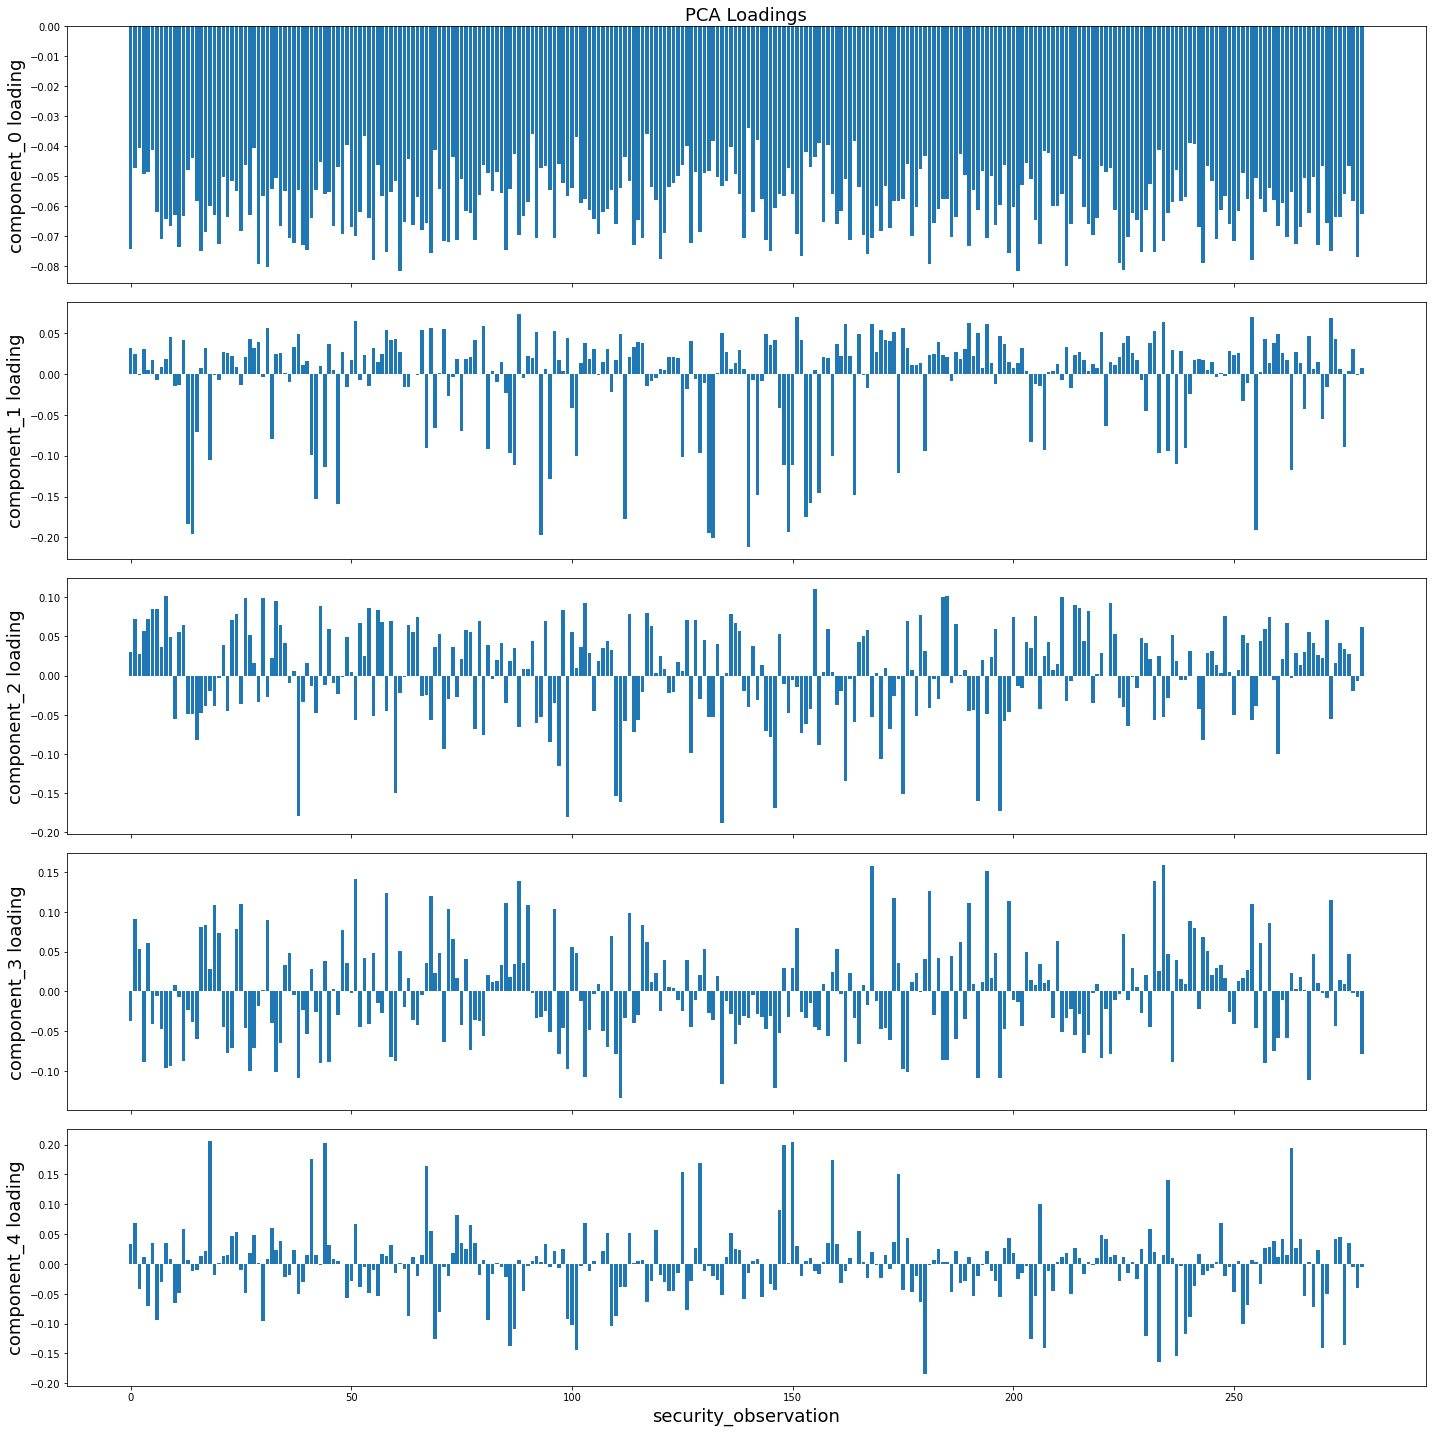

In [ ]:
'''
Function op.reduce_PCA automatically scales and computes the correlation matrix for the price series
Runs the correlation matrix through principal component analysis this defaults into giving the first 10 components  
Function op.plot_loadings plots loadings for each stock on the first principal components
'''
op.reduce_PCA()
op.plot_loadings()

Implementing PCA reduced the dimensions of our data from raws * column 2455x280 to 8x280. Below we chart the cumulative variance explained by the 8 dimensions in component space. We see the “market” component explains roughly 42% of the variance in price movements.


Total variance explained: 52.0%


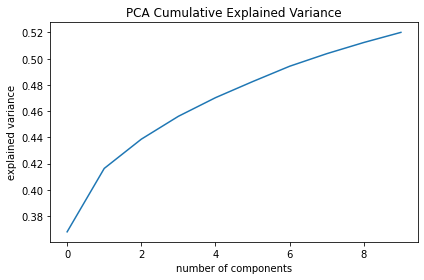

In [ ]:
import numpy as np 

'''
op.plot_explained_variance: the function plots the cumulative explained variance of the first sync components 
Returns cumulative variance as %
'''
op.plot_explained_variance()
total_variance_explained = np.cumsum(op.explained_variance_ratio_)[-1]
print(f"Total variance explained: {round(total_variance_explained, 2)*100}%")

## Part 2: Unsupervised Learning
### Apply OPTICS


Unlike other clustering algorithms, OPTICS computes an augmented cluster-ordering of the data rather than clustering the data explicitly. This frees the algorithm from relying on global parameters that might be heavily influenced by one cluster, but not accurately describe other clusters. It is a versatile basis for both automatic and interactive cluster analysis.Seatre (2019)
 

### Generate clusters and find potential trading pairs

The OPTICS algorithm identified 566 potential pairs of stocks that share a common label generated from unsupervised learning.


In [ ]:
'''
op.find_pairs function Applies the optics clustering algorithm not to the returns themselves.
but to the loadings on each of the components
Optics reduces chances of spiralling outliers
We apply the optics algorithm which is in the skicit.learn python package 
'''
op.find_pairs()
op.pairs

Found 566 potential pairs


0        (ANTM, CI)
1       (ANTM, DGX)
2       (ANTM, DVA)
3      (ANTM, HSIC)
4       (ANTM, HUM)
           ...     
561      (EVRG, FE)
562     (EVRG, LNT)
563       (EXC, FE)
564      (EXC, LNT)
565       (FE, LNT)
Length: 566, dtype: object

To visually inspect the clusters, we plot the loadings of the first two and first three principal components from each security. We can clearly see one cluster of securities that stands out from the rest in the upper left of the 2-dimensional graph. Additionally, when adding a third principal component, we can more easily see other clusters group together along the z-axis.

The light points share a common label indicate data points considered noise and are excluded and the corresponding securities are excluded from the potential pairs list. 


### Plot clusters found

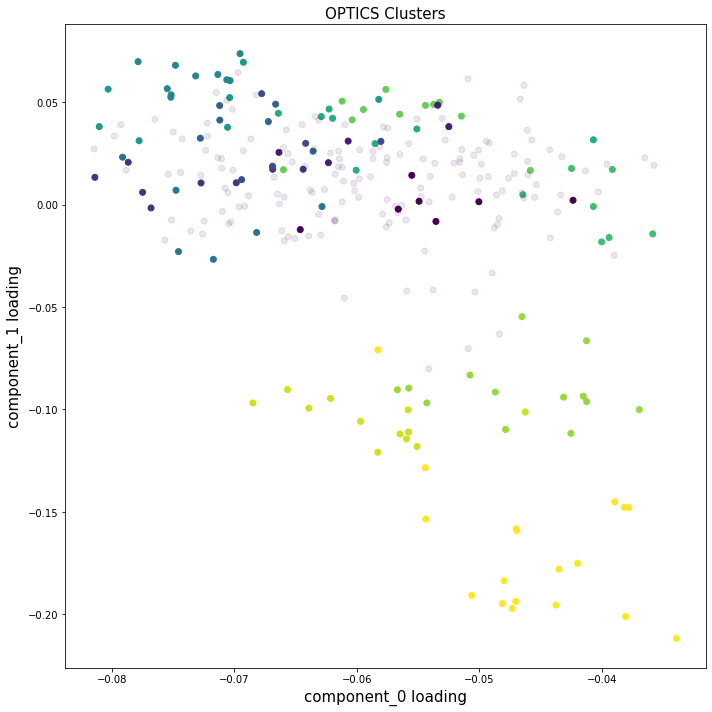

In [ ]:
'''
op.plot_clusters Function produces a scatter plot to visualize the loadings of every security,  each dot represents a single stock,
loadings on the 1st and second component 
function visualizes clusters of pairs of stocks
3 dimensional visualization of clusters showing all potential pairs within the same cluster
'''
op.plot_clusters(n_dimensions=2)


## Part 3: Select Pairs
### Apply Critera

Sarmento and Horta suggest four criteria to further filter the potential pairs to increase the probability of selecting pairs of securities whose prices will continue to mean revert in the future. 
* Statistically significant t-stat from the Engle-Granger test (5% level)
* Hurst exponent < 0.5  
* Half-life between [1, 252]   
* Spread must cross the mean on average 12x per year  

These four criteria indicate positive characteristics for potential pairs of stocks. The Engle-Granger tests the pair for cointegration. A Hurst exponent below 0.5 indicates that the pair of prices regresses strongly to the mean. Pairs with extreme half-life values, below 1 or above 252, are excluded from the selected pairs. Extreme half-life values indicate a price series that either reverts too quickly or too slowly to be traded. Finally, the price series must cross the long-term spread mean on average 12 times a year. This enforces one trade on average, per month.


The general idea simplified is that the 4 criterion seeks to find high quality pairs for pairs trading

* 1st test is a test for cointergration  (test to find a linear combination of 2 stocks that are stationary, constant mean over time )

* 2nd test a security with a Hurst component lest than 0,5 indicates that a time swries reverts to the mean instead of diverging 

* 3rd half life test in between 1 day and 252 trading days , half life being the time it takes for a value to revert to half  ( if less than 1 day spread is moving too quick to be able to capitalize or trade on it longer thsn 1 year means you'd wait to wait too long in order for the pair to mean revert hence it will take too long to realize gains

* 4th test A test to ensure there is enough tradable opportunities for the end user (measures average number of times the stock pair crosses the mean)

**After filtering potential pairs, we find 19 pairs of securities that meet all four criteria. We plot the prices individual prices series and the beta-adjusted spread for each pair below.**

### Calculate potential pair statistics

In [ ]:
# Functions below are calculating potential pair statistics

op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Filter potential pairs

In [ ]:
# op.filter_pairs Function is filtering on the basis of the 4 part criterion to derive potential pairs
op.filter_pairs()
op.filtered_pairs

Found 19 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count
110,"(C, GS)",0.047250,0.425962,60.392721,14.904573
132,"(GS, LNC)",0.002797,0.391483,47.111947,15.656064
145,"(AMP, COF)",0.037642,0.429141,40.051704,14.403579
155,"(COF, DFS)",0.005096,0.362271,42.795488,16.157058
177,"(AMAT, MCHP)",0.000496,0.345522,30.154873,13.401590
192,"(LRCX, MCHP)",0.001865,0.357856,35.798650,12.775348
415,"(AEE, ATO)",0.029956,0.400411,46.156433,15.906561
416,"(AEE, AWK)",0.020670,0.402637,50.105876,15.530815
432,"(AEP, AWK)",0.028830,0.382011,55.464969,12.149105
433,"(AEP, CMS)",0.038525,0.425116,41.818063,14.403579


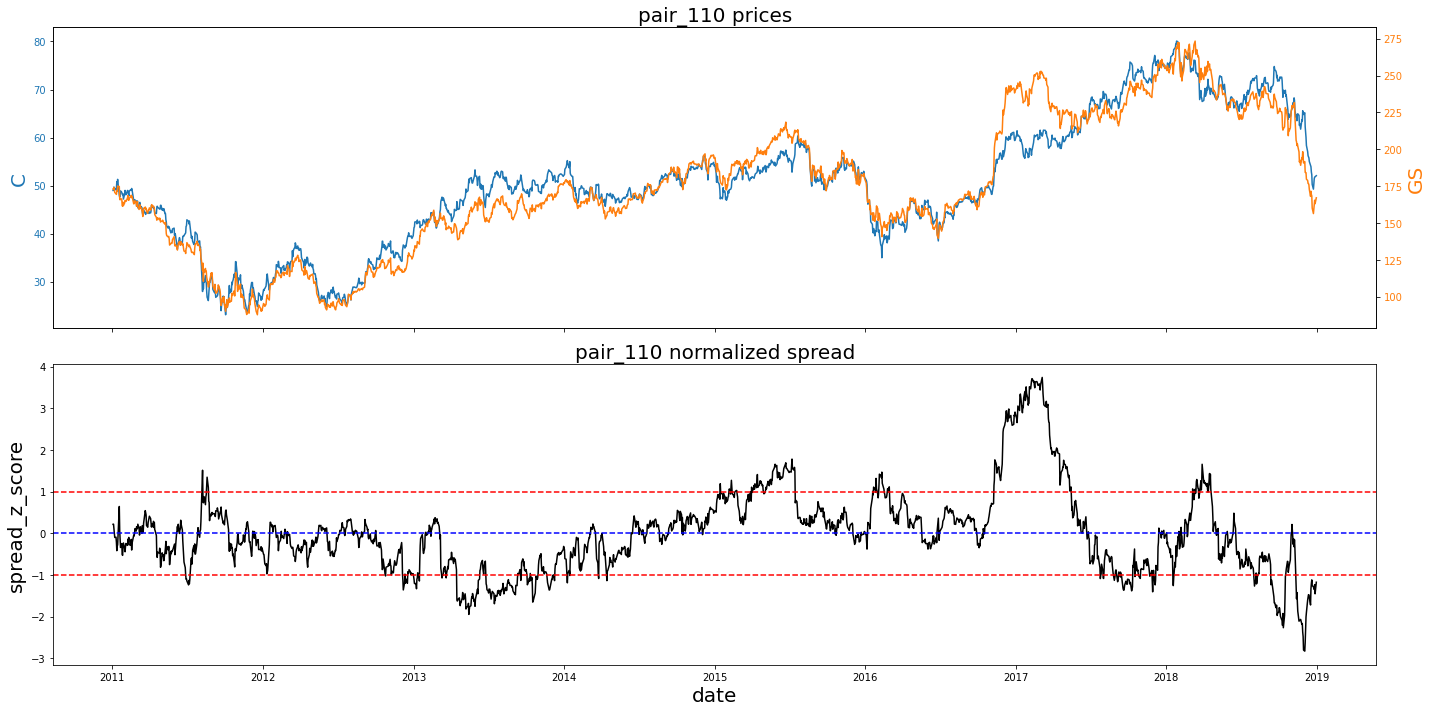

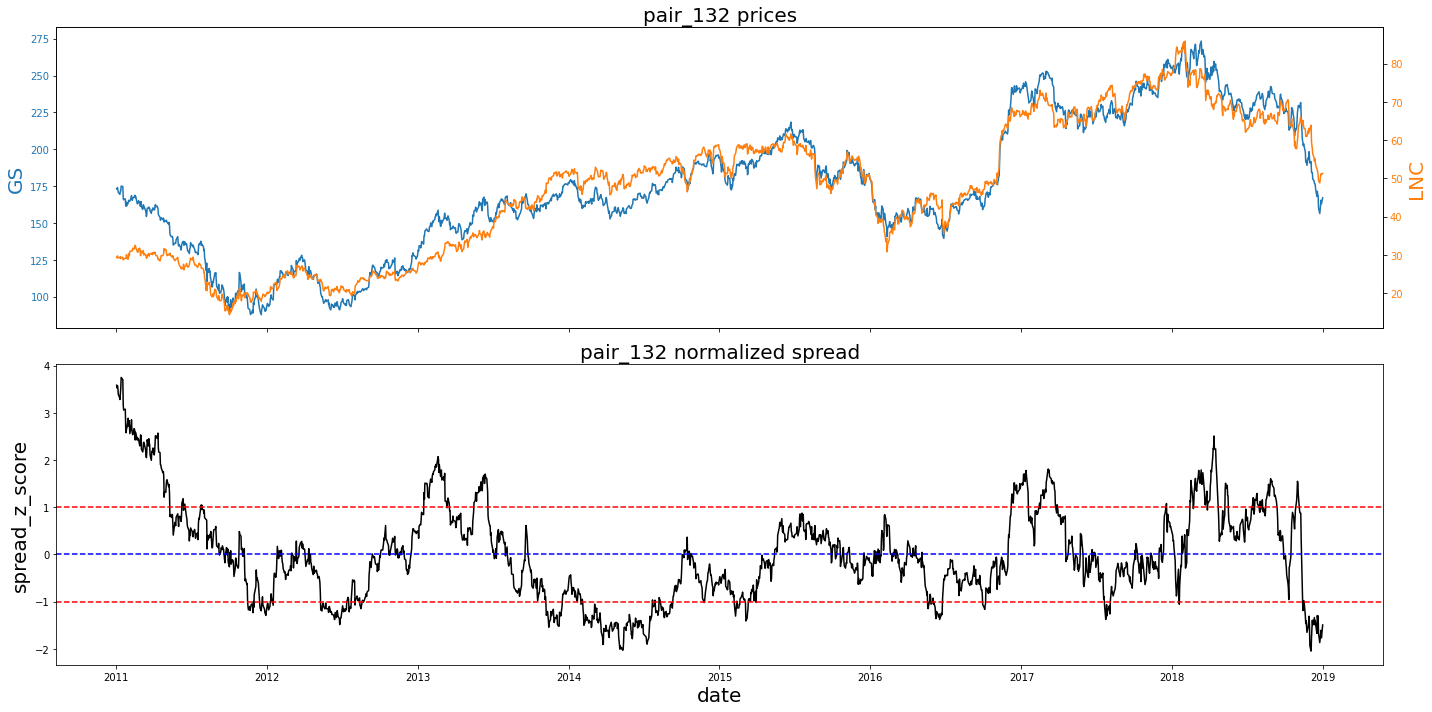

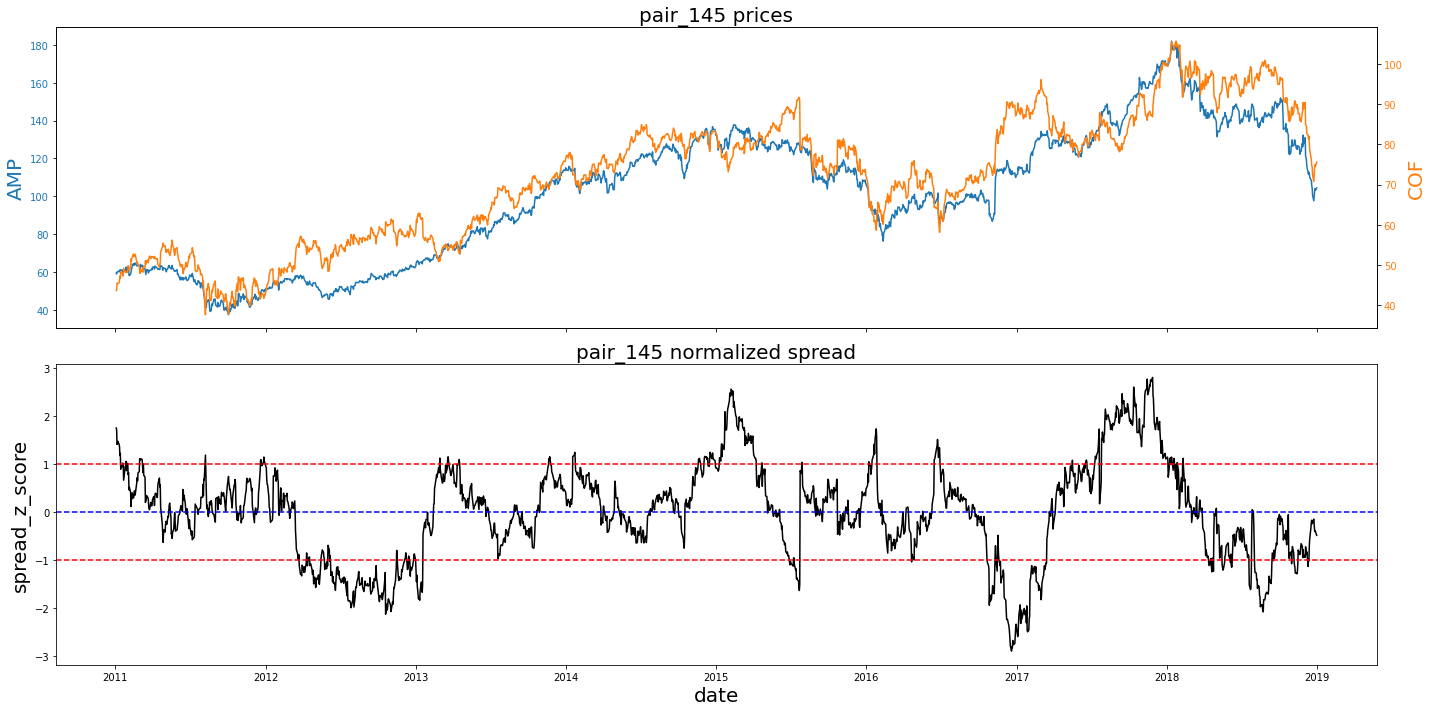

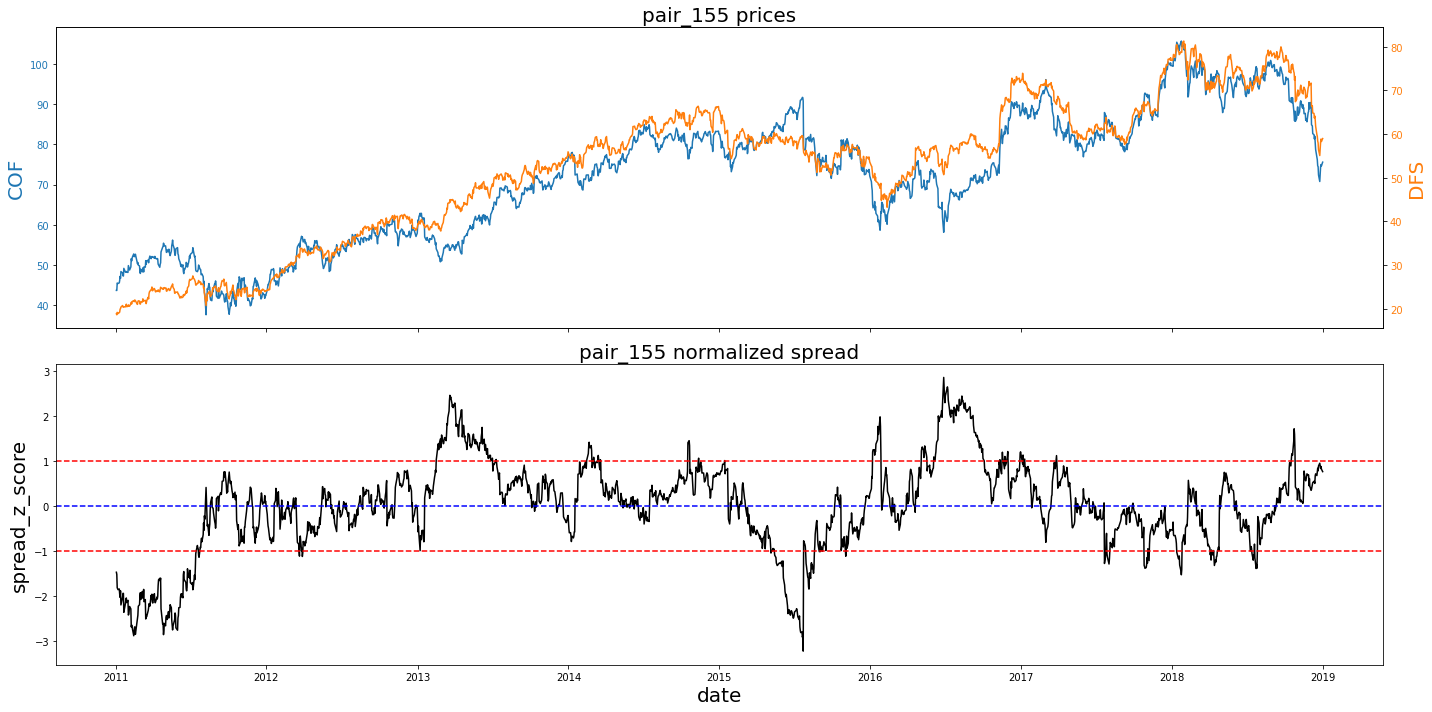

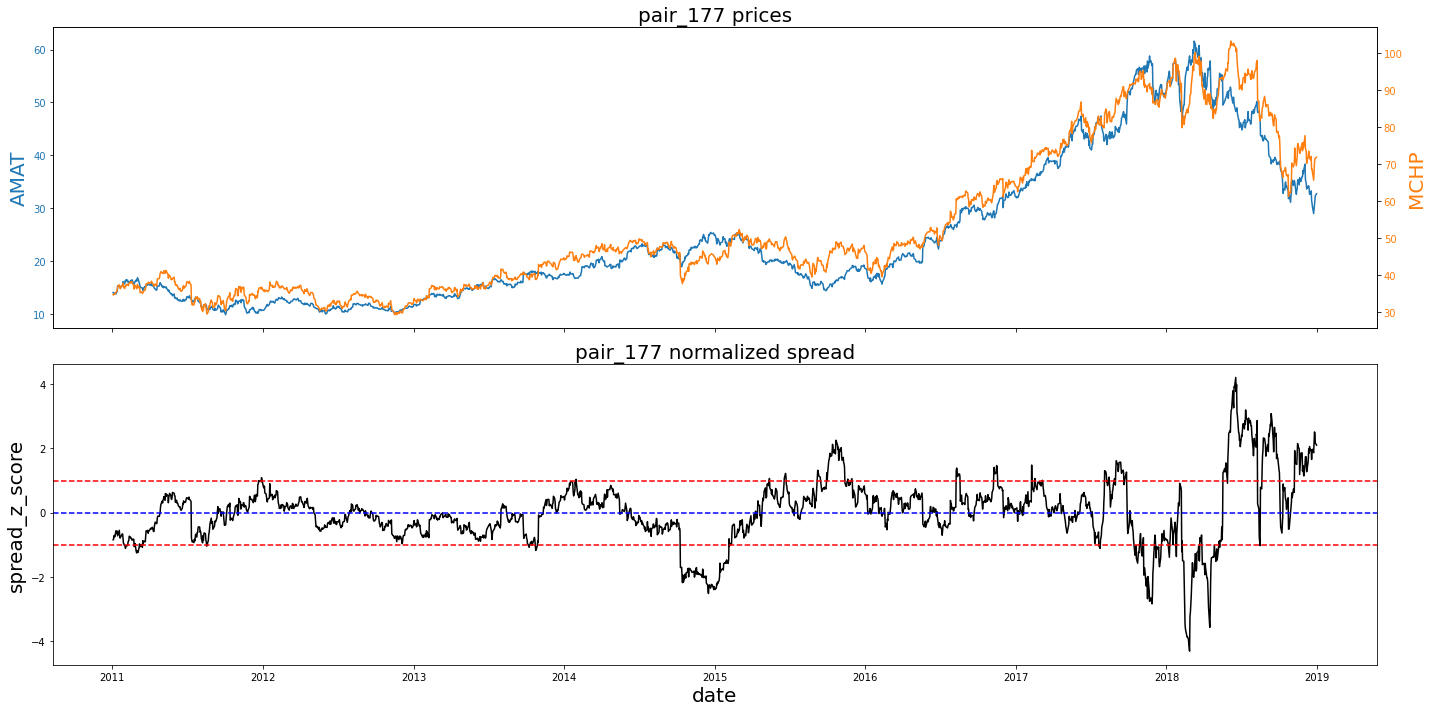

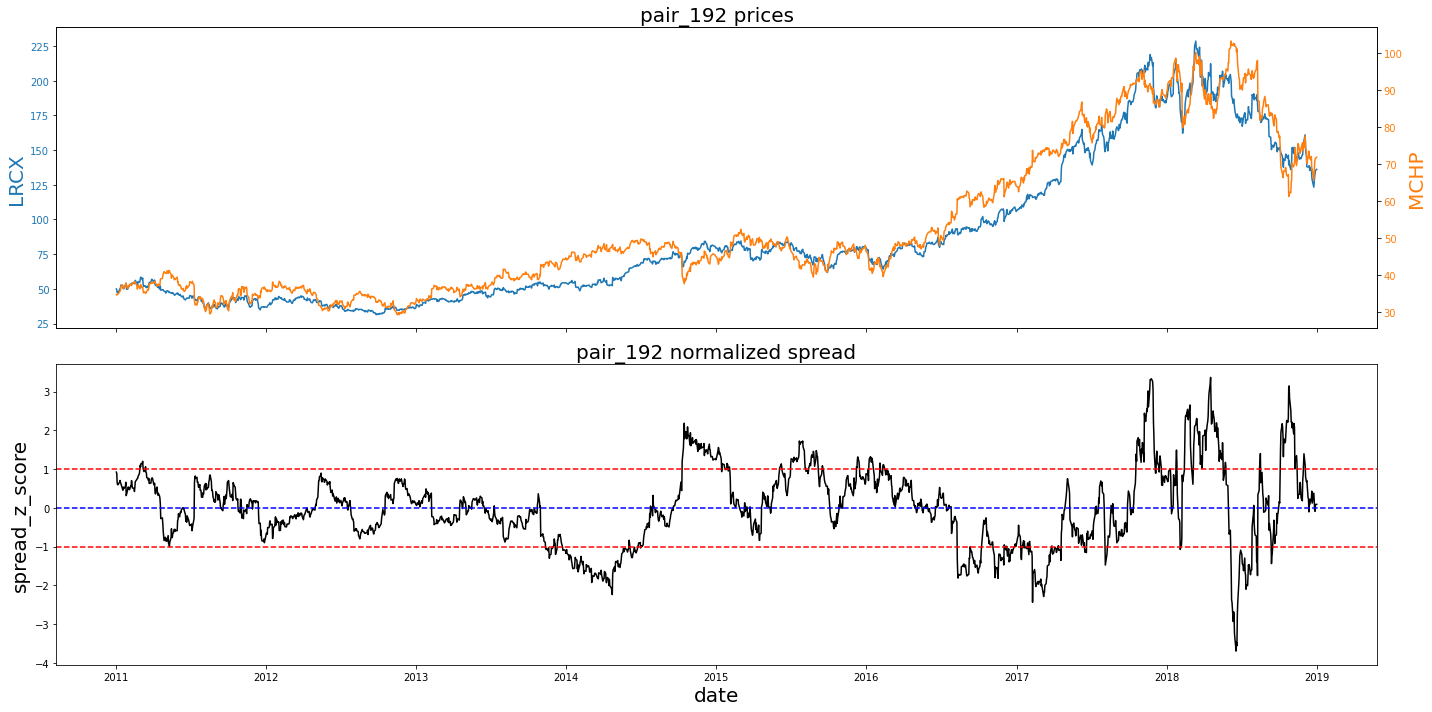

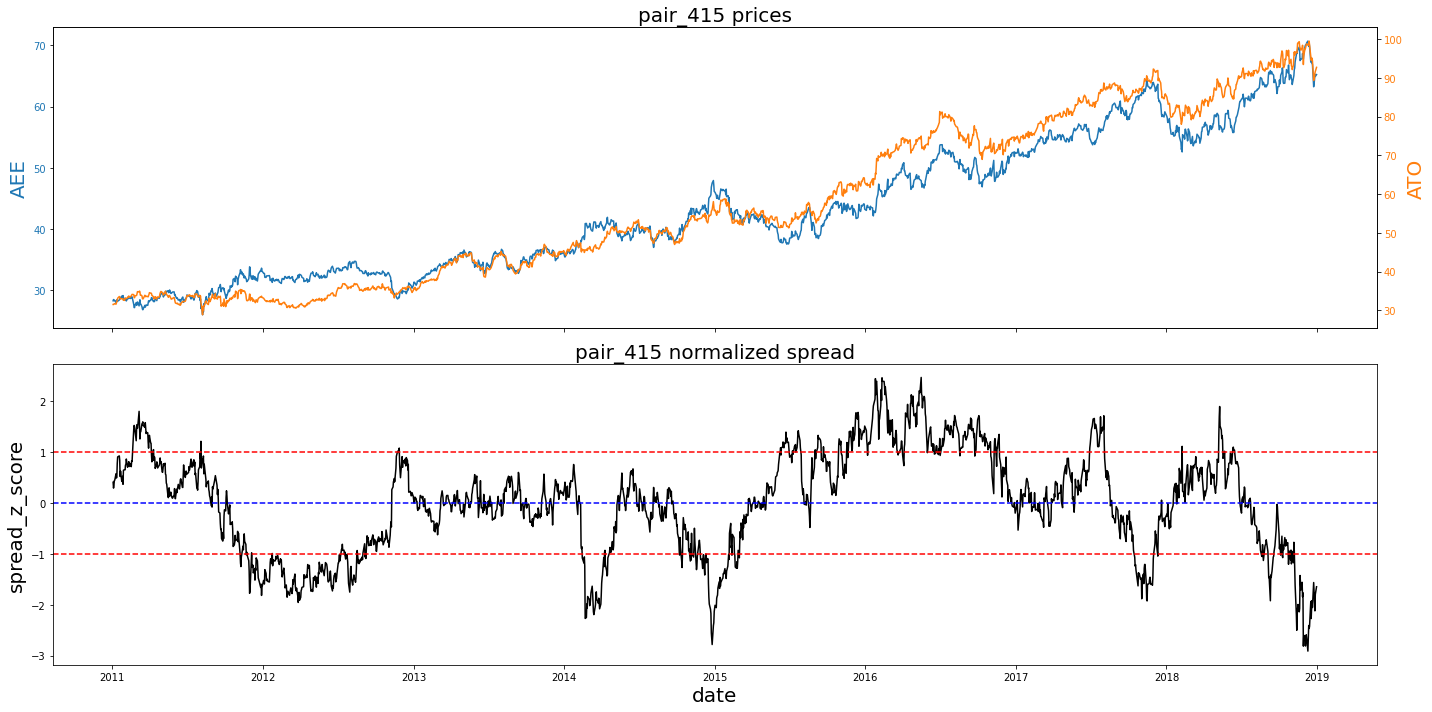

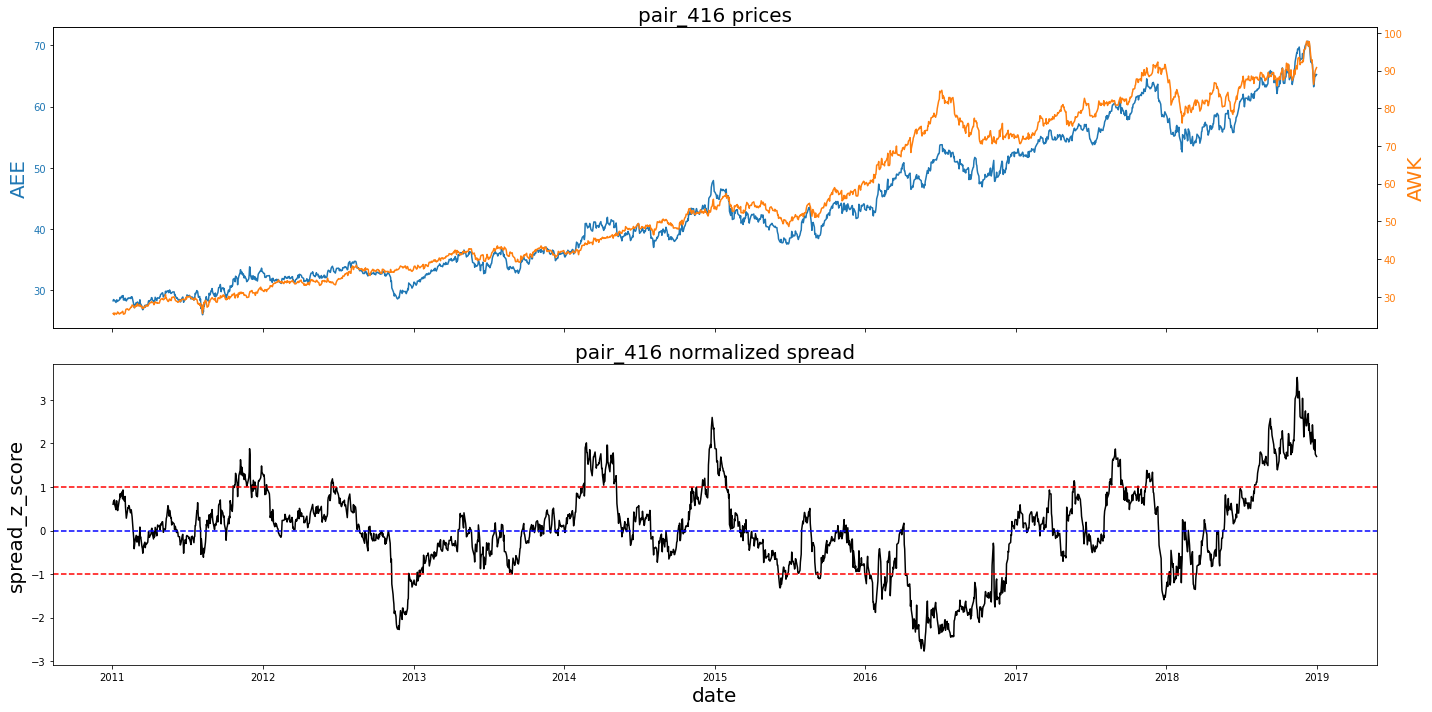

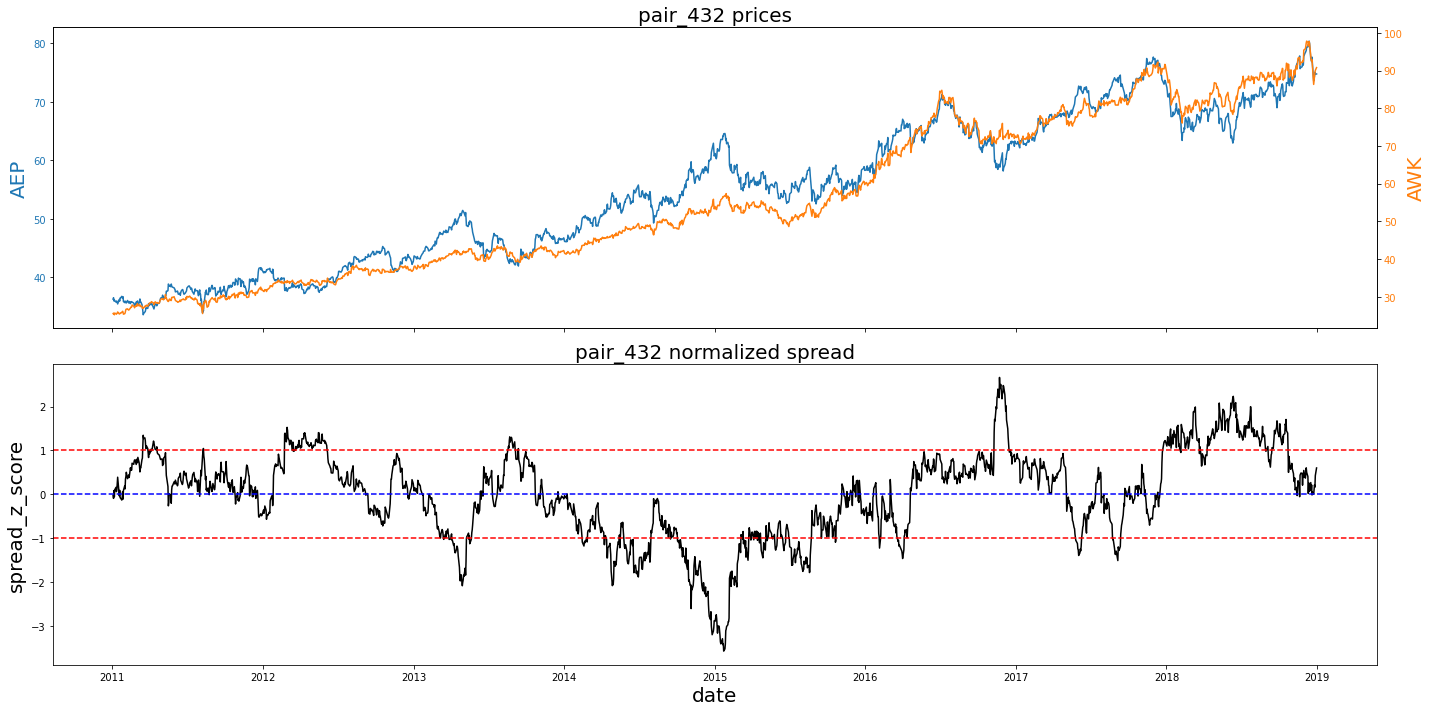

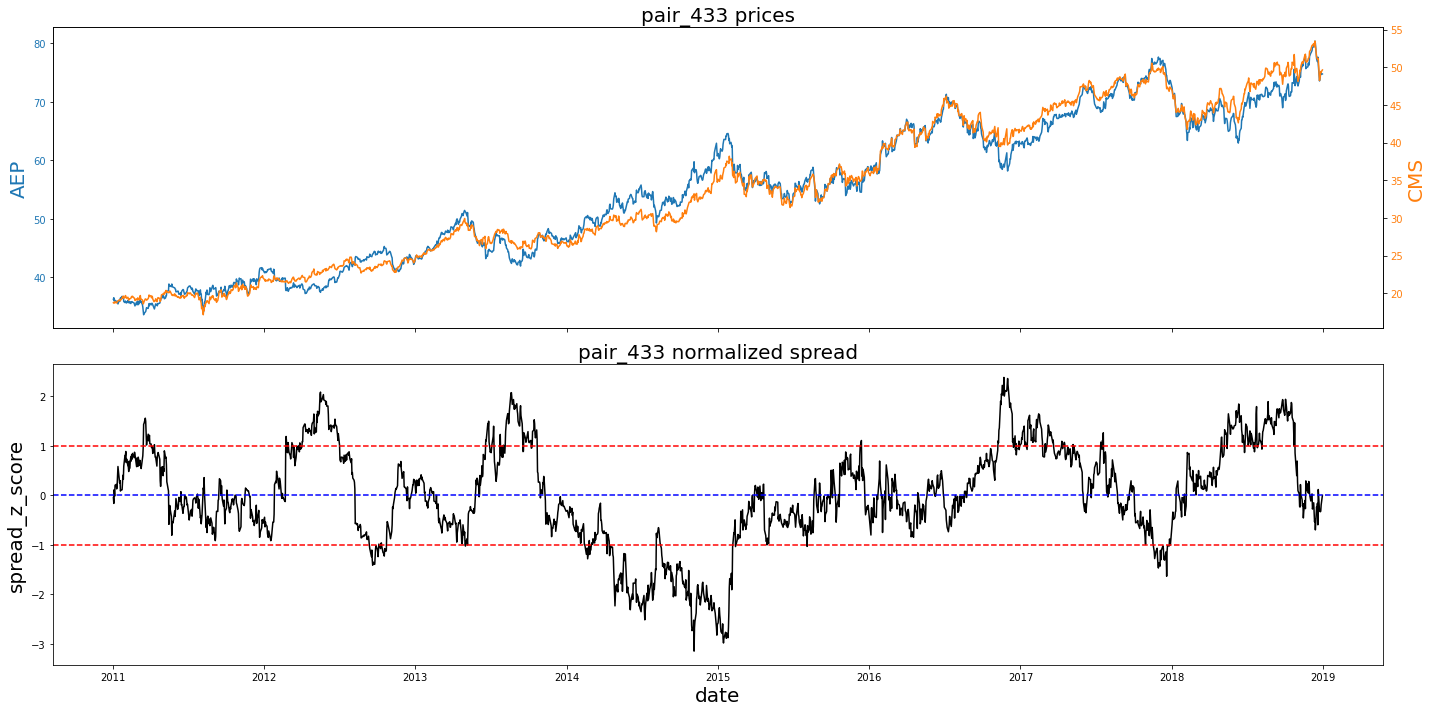

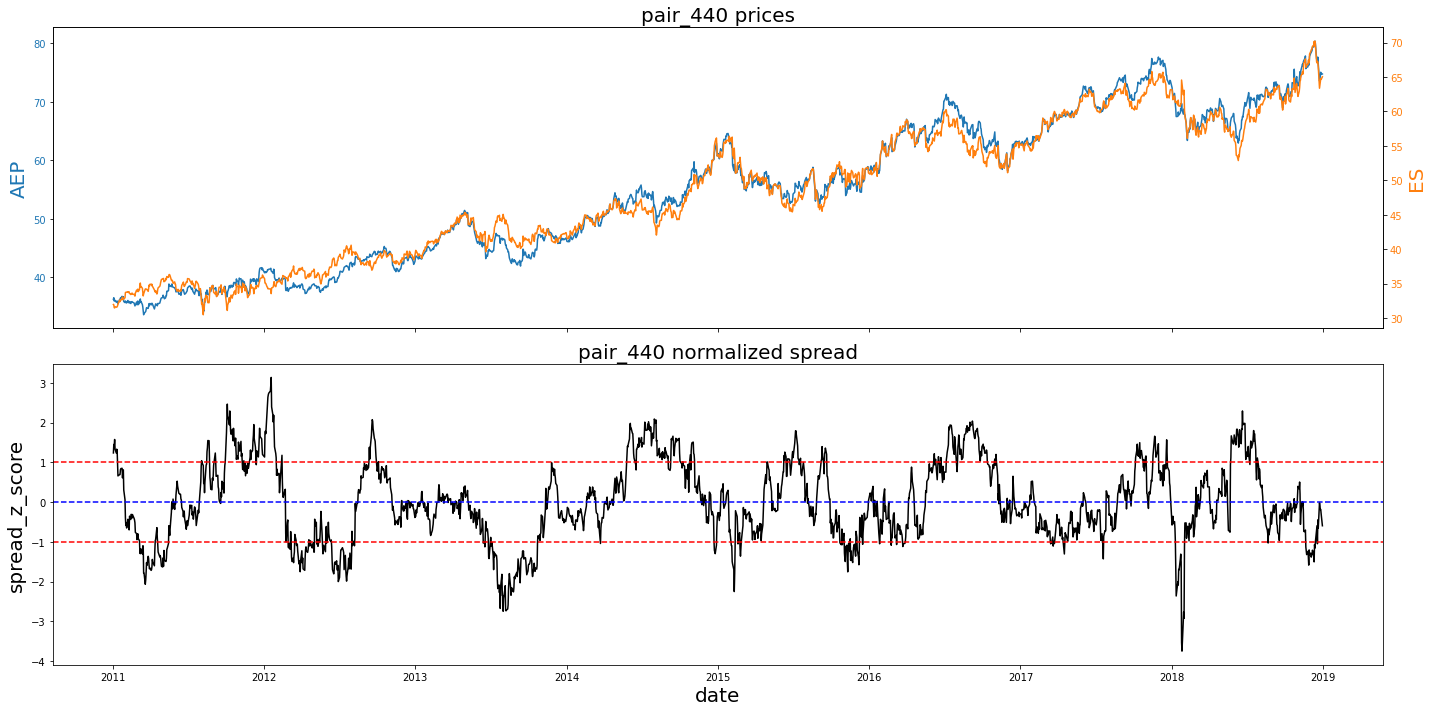

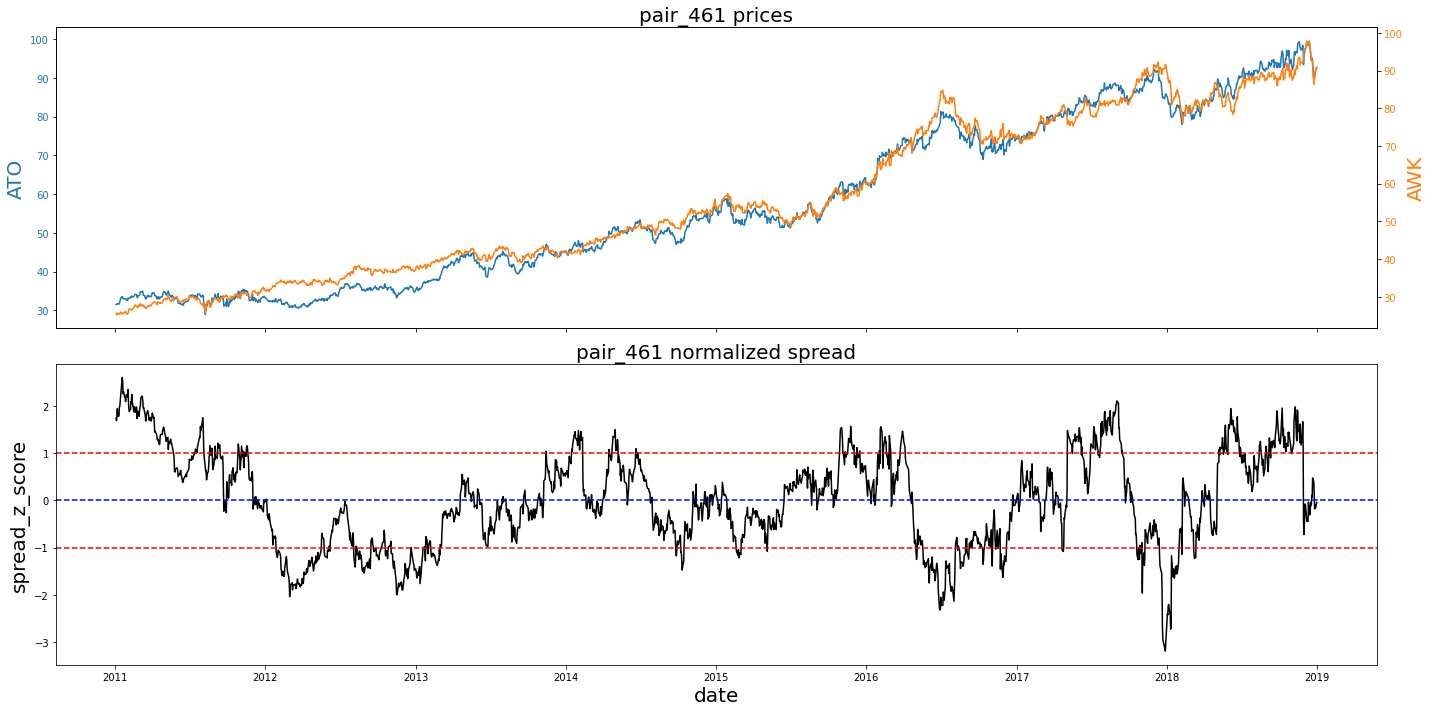

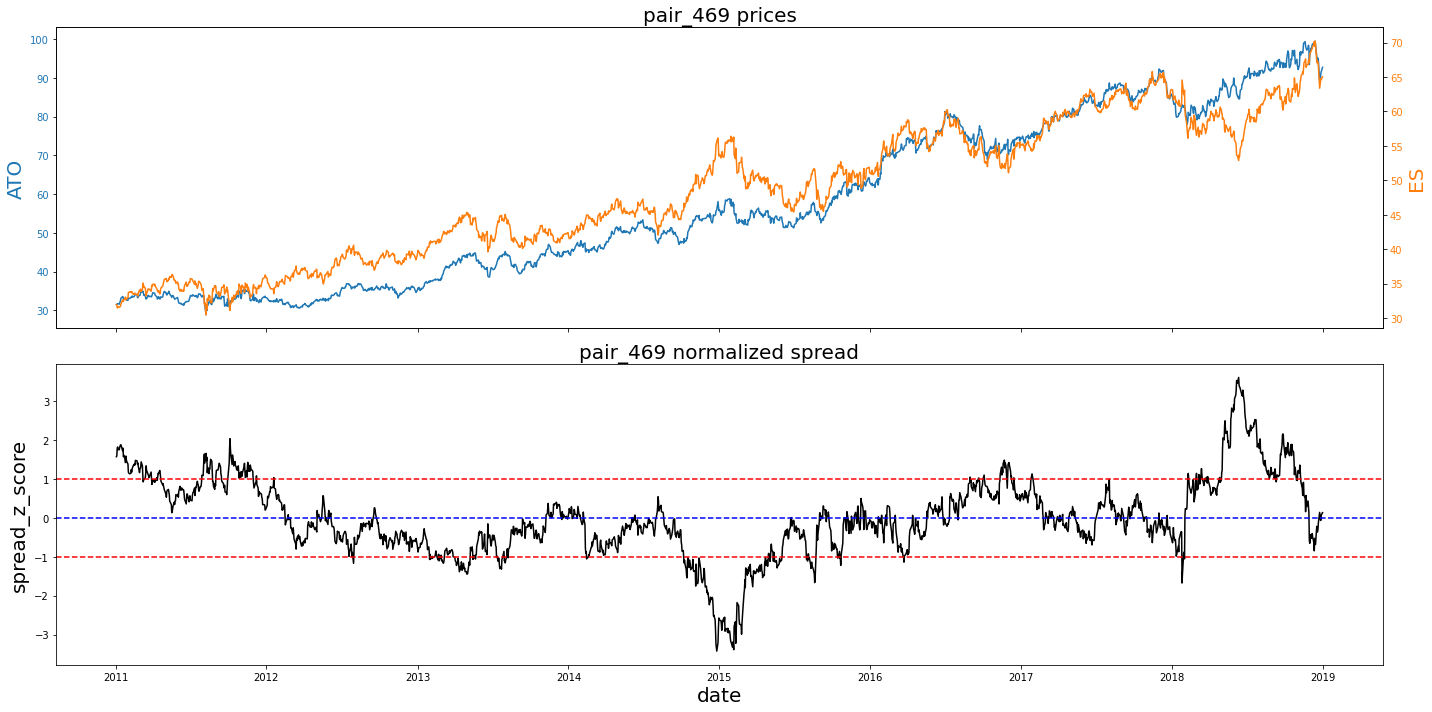

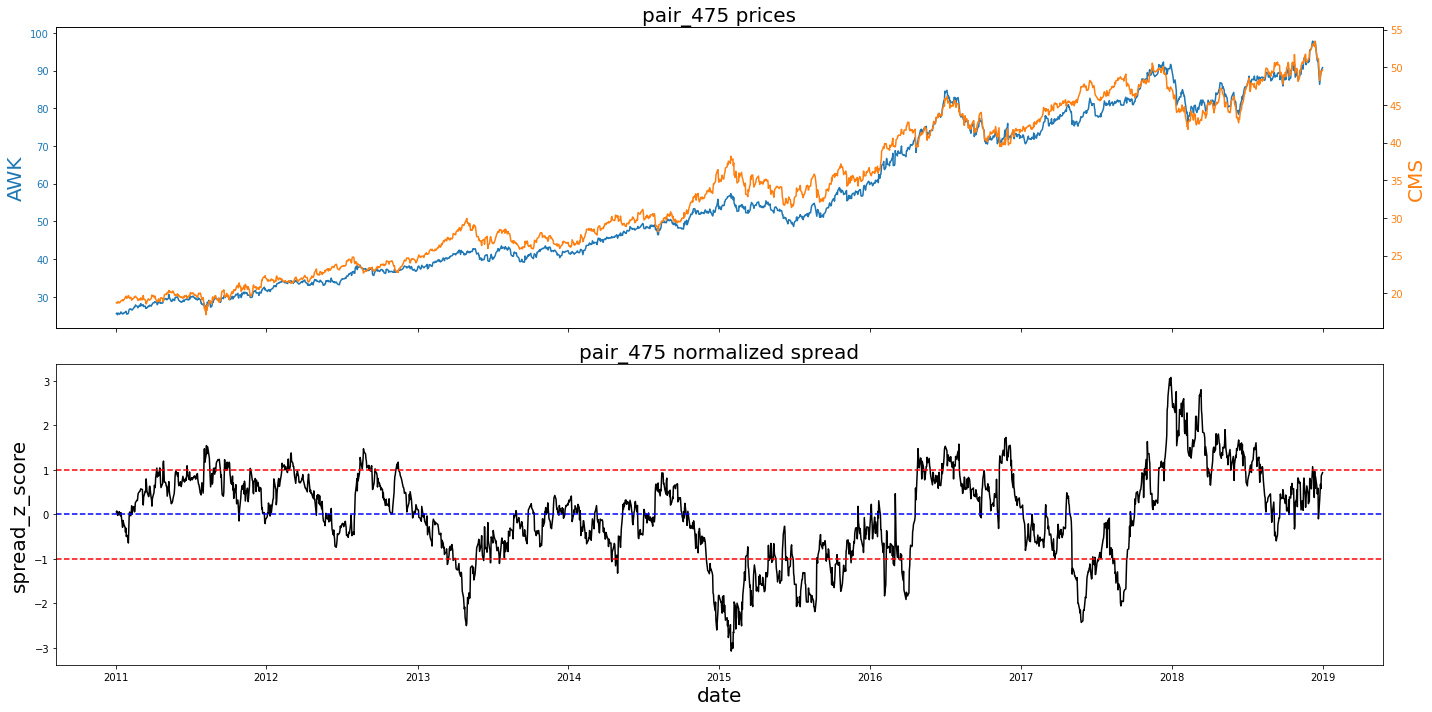

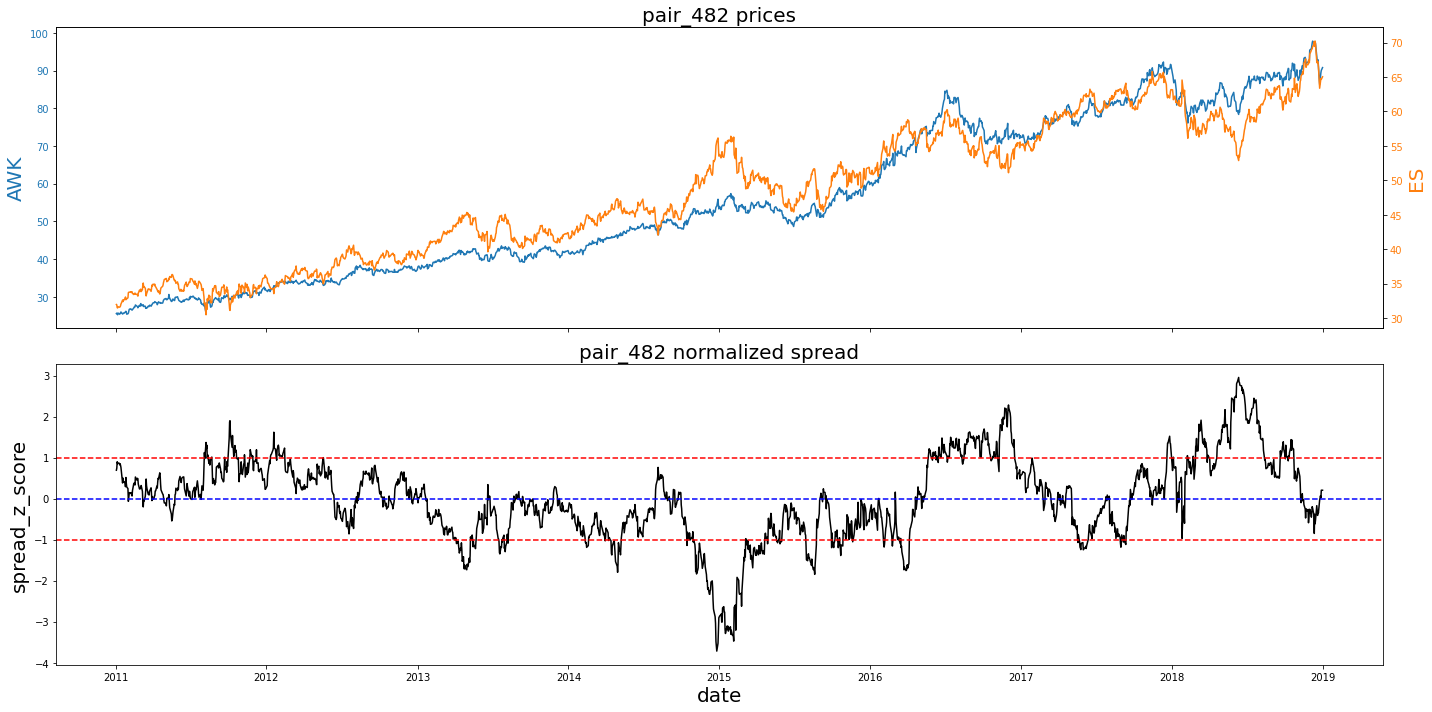

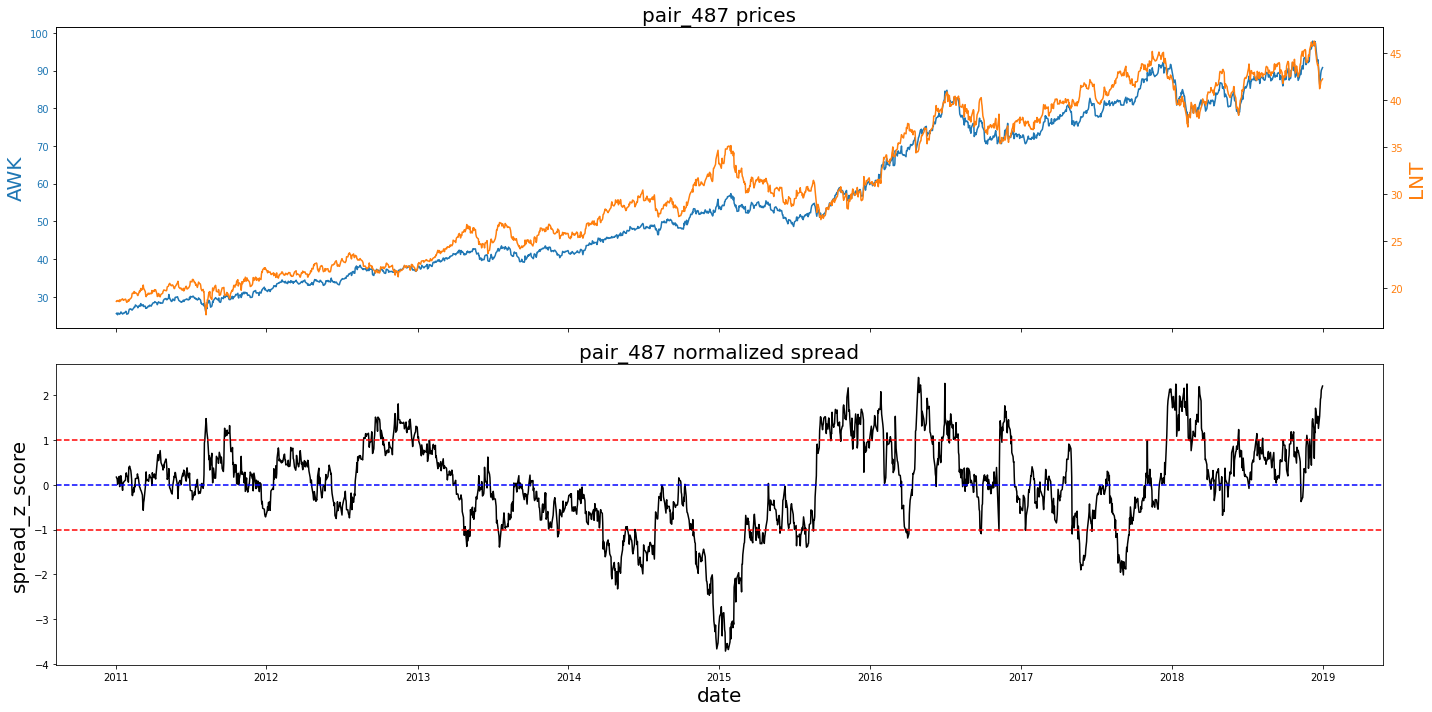

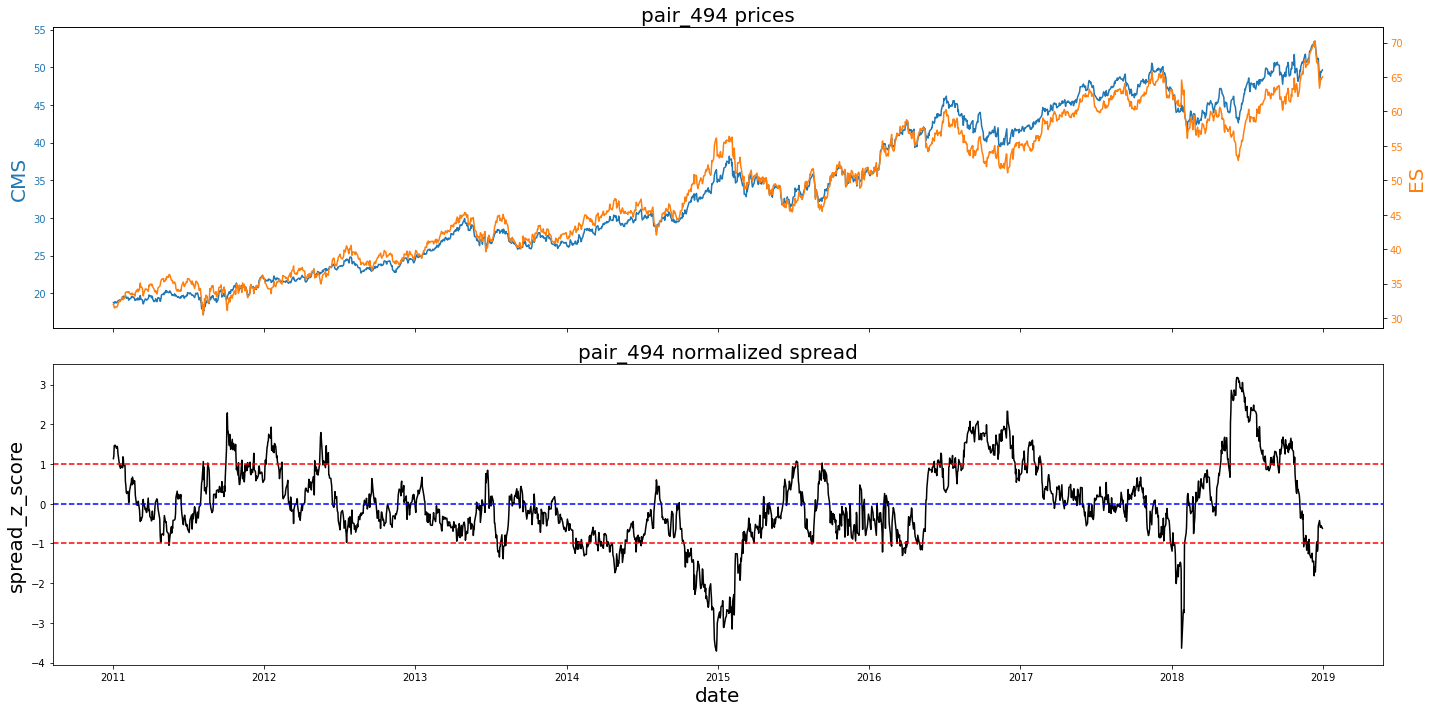

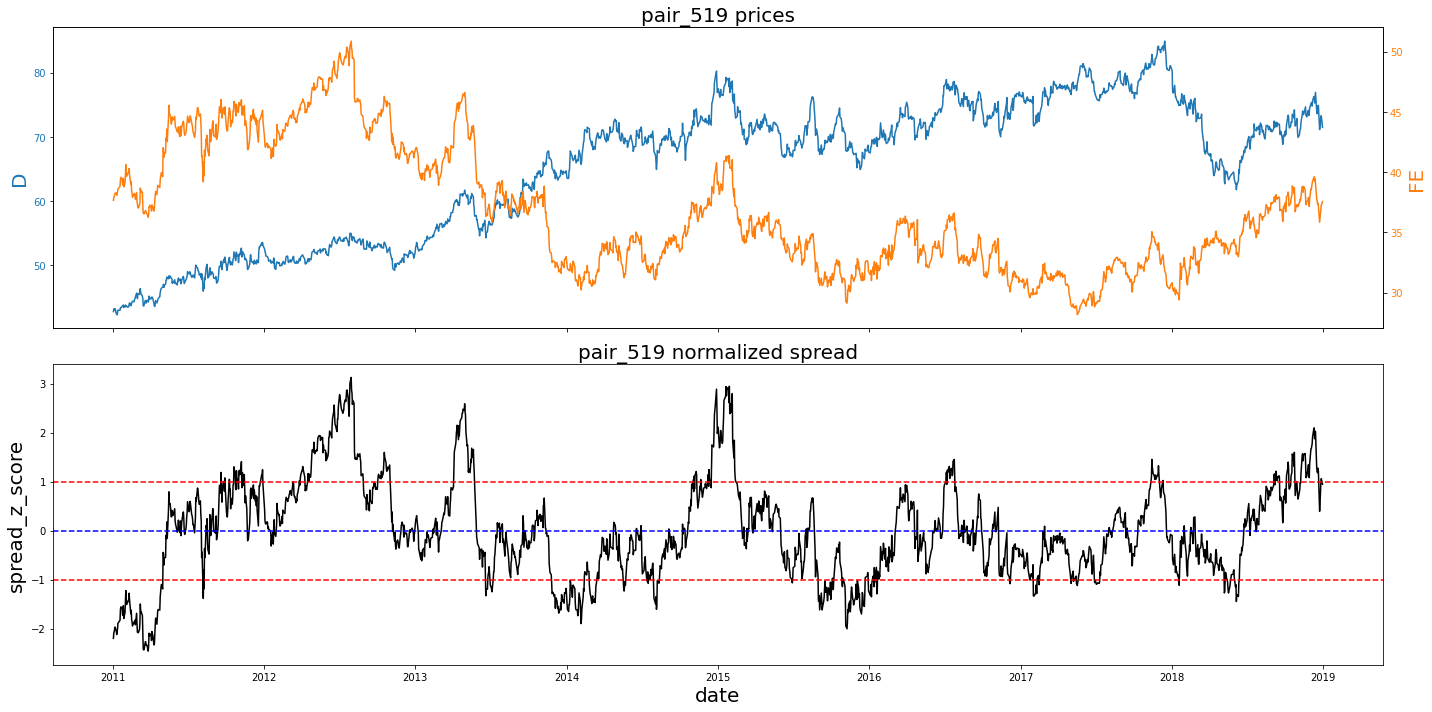

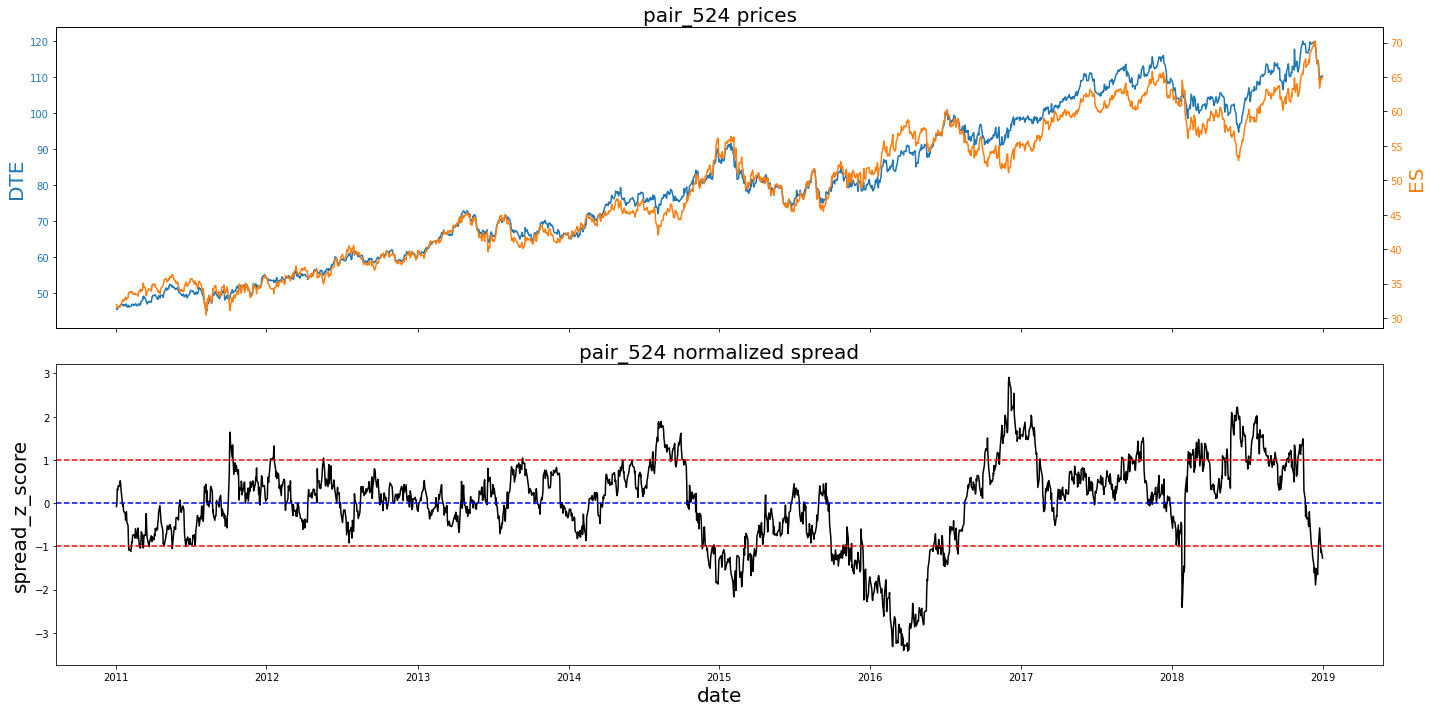

In [ ]:
'''
The function below is plotting the raw price series of the pairs of stock,
as well as the normalized spread
'''
for i in op.filtered_pairs.index:
    op.plot_pair_price_spread(idx=i)

## Conclusion


This notebook demonstrates an empirical example of the pairs selection process outlined in [1] to efficiently reduce the search space and select quality trading pairs. Roughly 9 years of daily stock price data for 280 stocks were reduced to 8 dimensions through principal component analysis. Next, over 566 potential trading pairs were identified through OPTICS clustering. 19 pairs from the clusters met the four selection criteria.

### References:
[1] Sarmento, Simão, and Nuno Horta. “A Machine Learning Based Pairs Trading Investment Strategy: Simão Sarmento.” Springer, Springer International Publishing, 2020, www.springer.com/gp/book/9783030472504.  


